In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    all_articles = pickle.load(data)
    
    
#TD-IDF Features    
#Training Features
training_features_path = "./Pickles/tdidf_training_features.pickle"
with open(training_features_path, 'rb') as data:
    tdidf_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/tdidf_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    tdidf_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/tdidf_test_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/tdidf_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/tdidf_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/tdidf_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_validation_labels = pickle.load(data)
    
    
#Sequence Vector Features    
#Training Features
training_features_path = "./Pickles/sv_training_features.pickle"
with open(training_features_path, 'rb') as data:
    sv_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/sv_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    sv_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/sv_test_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/sv_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/sv_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/sv_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_validation_labels = pickle.load(data)


In [3]:
print(tdidf_training_features.shape)
print(tdidf_test_features.shape)

(5760, 1000)
(720, 1000)


In [4]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [12]:
best_svc = svc = svm.SVC(kernel="rbf", gamma=5, C=1)

In [13]:
best_svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
best_svc.fit(tdidf_training_features, tdidf_training_labels)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
svc_pred = best_svc.predict(tdidf_test_features)

In [16]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(tdidf_training_labels, best_svc.predict(tdidf_training_features)))

The training accuracy is: 
0.9765625


In [17]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(tdidf_test_labels, svc_pred))

The test accuracy is: 
0.7569444444444444


In [18]:
# Classification report
print("Classification report")
print(classification_report(tdidf_test_labels,svc_pred))

Classification report
              precision    recall  f1-score   support

           1       0.80      0.75      0.77       130
           2       0.97      0.85      0.91       130
           3       0.65      0.96      0.77       113
           4       0.81      0.70      0.75       113
           5       0.70      0.48      0.57       110
           6       0.67      0.78      0.72       124

   micro avg       0.76      0.76      0.76       720
   macro avg       0.77      0.75      0.75       720
weighted avg       0.77      0.76      0.75       720



In [19]:
category_mapping = {
    'Singapore': 1,
    'Sports': 2,
    'Lifestyle': 3,
    'World': 4,
    'Business': 5,
    'Technology': 6
}

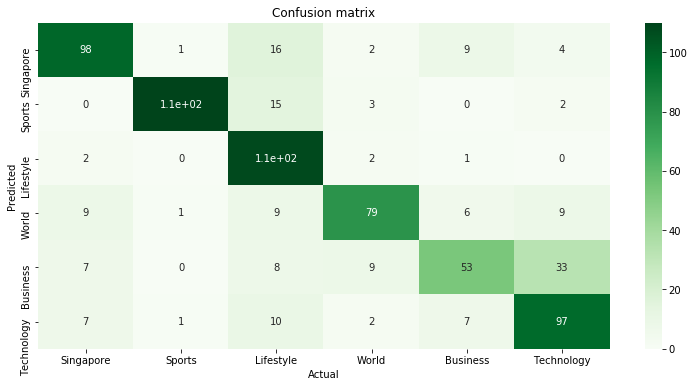

In [20]:
aux_df = all_articles[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(tdidf_test_labels, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=category_mapping, 
            yticklabels=category_mapping,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [21]:
base_model = svm.SVC(random_state = 8)
base_model.fit(tdidf_training_features, tdidf_training_labels)
accuracy_score(tdidf_test_labels, base_model.predict(tdidf_test_features))

/Users/sgxdev/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.15694444444444444

In [22]:

best_svc.fit(tdidf_training_features, tdidf_training_labels)
accuracy_score(tdidf_test_labels, best_svc.predict(tdidf_test_features))

0.7569444444444444

In [23]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(tdidf_training_labels, best_svc.predict(tdidf_training_features)),
     'Test Set Accuracy': accuracy_score(tdidf_test_labels, svc_pred)
}

df_models_svc = pd.DataFrame(d, index=[0])

In [24]:
df_models_svc

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,0.976562,0.756944
